# КДЗ «Сортировки»

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

<a href="https://github.com/Alexxios/Sort-comparison">Ссылка на репозиторий</a>

Генерация случайных чисел во всех частях производится с помощью встроенного в язык С++ генератора mt19937.

## Обязательная часть КДЗ

С помощью программы <a href="https://github.com/Alexxios/Sort-comparison/blob/main/sources/main.cpp">sources/main.cpp</a> был получен файл, содержащий значения времени работы сортировок вставками (Insert Sort) и слиянием (Merge Sort) на случайных наборах целых чисел длины $N,\quad N\in\{5, 10, 15, 20, 30,\\ 45, 60, 80, 100, 200, 300, 500, 1000, 2000, 5000, 8000\}$. Для каждого значения $N$ проведено $T=50$ генераций случайного набора длины $N$. Для каждого сгенерированного набора замерено время работы каждой из сортировок на нем в миллисекундах.

In [70]:
data = pd.read_csv("main_part.txt", sep=';', header=0)
data

,N,Insert Sort,Merge Sort
0,5,0.000333,0.001208
1,5,0.000208,0.000958
2,5,0.000291,0.000875
3,5,0.000167,0.000791
4,5,0.000333,0.000791
...,...,...,...
895,15000,227.127375,2.949666
896,15000,223.689292,2.944292
897,15000,223.517959,2.917334
898,15000,220.968334,2.895417


### Таблица усредненных значений (среднее время на наборе размера $N$)

По полученным данным составим таблицу с усредненными по размеру набора $N$ значениями времени выполнения обеих сортировок.

In [71]:
mean = data.groupby(['N']).mean()
mean

,Insert Sort,Merge Sort
N,,
5,0.000236,0.000742
10,0.000605,0.001455
15,0.001023,0.002323
20,0.001502,0.003122
30,0.002814,0.005057
45,0.005782,0.008233
60,0.009451,0.011327
80,0.015699,0.015709
100,0.020649,0.018092


По таблице видно, что на небольших $N$ (до 60) сортировка вставками обыгрывает сортировку слиянием в скорости. При $N\approx80$ время работы выравнивается, а при больших значениях - сортировка слиянием работает быстрее. Начиная с $N=5000$, сортировка слиянием сортировка слиянием выигрывает существенно (в десятки раз). 

In [72]:
def plot(df):
    col0 = df.columns[0]
    mean = df.groupby([col0]).mean()
    
    plt.figure(figsize=(10,10))
    for col in df.columns[1:]:
        plt.scatter(df[col0], df[col], label=col + ' execution times')
        plt.plot(mean.index, mean[col], label=col + ' average execution time')
    
    plt.xlabel(col0)
    plt.ylabel('Runtime, ms')
    plt.legend(loc='upper left')
    plt.show()

Построим графики зависимости времени работы сортировок от размера набора ($N$).

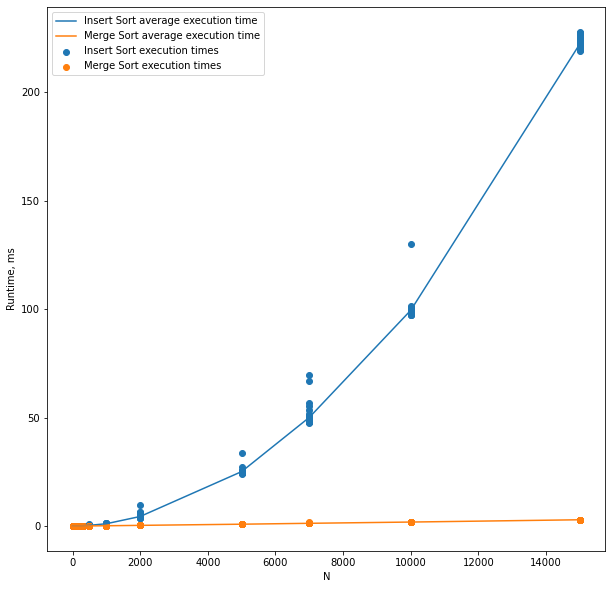

In [73]:
plot(data)

По общему графику можно сделать 2 вывода:
1. На больших значениях $N$ сортировка вставками работает намного хуже (в смысле времени работы), но это было видно и по таблице
2. Сортировка вставками имеет большую дисперсию (разброс) времени работы на $N \geqslant 2000$ в сравнении с сортировкой слиянием

Однако общий график не отражает превосходство сортировки вставками на небольших $N$. Построим отдельный график для значений $N \leqslant 200$.

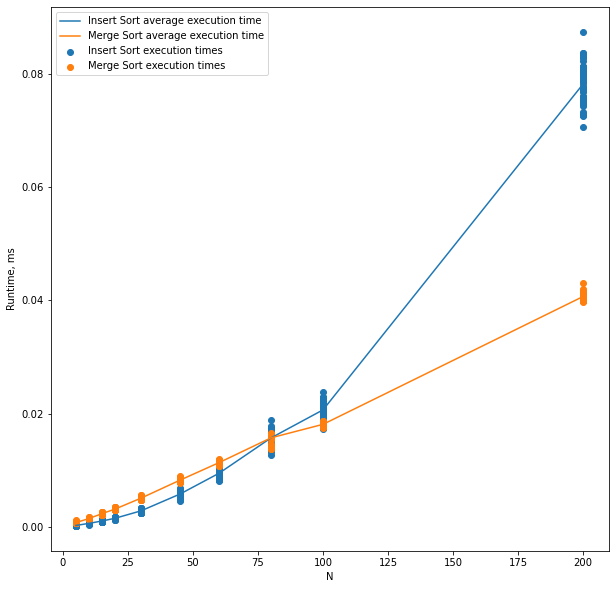

In [74]:
plot(data[data['N'] <= 200])

## Сравнение эффективных сортировок

С помощью программы <a href="https://github.com/Alexxios/Sort-comparison/blob/main/sources/efficient.cpp">sources/efficient.cpp</a> был получен файл, содержащий значения времени работы эффективных сортировок на случайных наборах целых чисел длины $N,\quad N\in\{60, 80, 100, 200, 300, 500, 1000, 2000, 5000, 15000,\\ 30000, 100000, 250000, 500000, 750000, 1000000\}$. Для каждого значения $N$ проведено $T=10$ генераций случайного набора длины $N$. Для каждого сгенерированного набора замерено время работы каждой из сортировок на нем в миллисекундах.

Исследуемые эффективные сортировки:
1. Сортировка слиянием (Merge Sort)
2. Быстрая сортировка (Quick Sort)
3. Пирамидальная сортировка (Heap Sort)
4. Быстрая сортировку с гарантированным 
временем работы $O(N \log N)$ и сортировкой пятерок чисел за 7
сравнений (Quick Sort Modification)
5. Cортировка с использованием Skip List (Sort with Skip List)

In [75]:
data = pd.read_csv("efficient_comparison.txt", sep=';', header=0)
data

,N,Merge Sort,Quick Sort,Heap Sort,Quick Sort Modification,Sort with Skip List
0,60,0.016166,0.009542,0.035667,0.134458,0.147500
1,60,0.015417,0.009500,0.036292,0.144417,0.106417
2,60,0.023542,0.012541,0.040917,0.147708,0.108167
3,60,0.018084,0.010625,0.042250,0.167375,0.102459
4,60,0.018250,0.011875,0.043000,0.144667,0.105334
...,...,...,...,...,...,...
155,1000000,275.848166,184.150792,431.572333,1655.125791,789.999875
156,1000000,280.042542,181.349958,429.692333,1636.000083,868.354959
157,1000000,277.734083,180.606500,432.405041,1647.941750,797.383958
158,1000000,276.182708,180.182791,427.673708,1647.273541,787.276333


### Таблица усредненных значений (среднее время на наборе размера N)

Как и ранее составим таблицу с усредненными по размеру набора $N$ значениями времени выполнения сортировок.

In [76]:
mean = data.groupby(['N']).mean()
mean

,Merge Sort,Quick Sort,Heap Sort,Quick Sort Modification,Sort with Skip List
N,,,,,
60,0.017058,0.010508,0.040063,0.144363,0.104863
80,0.025088,0.018696,0.047246,0.207750,0.141383
100,0.030542,0.023188,0.053421,0.257004,0.141863
200,0.059338,0.045029,0.101237,0.476204,0.204467
300,0.082725,0.061546,0.136850,0.643504,0.255850
500,0.119225,0.088867,0.197617,0.927162,0.335717
1000,0.200387,0.147212,0.326471,1.519125,0.502508
2000,0.335308,0.239879,0.535933,2.443729,0.755400
5000,0.866412,0.608283,1.362854,6.007654,1.824321


Построим общий график зависимости времени работы от размера набора.

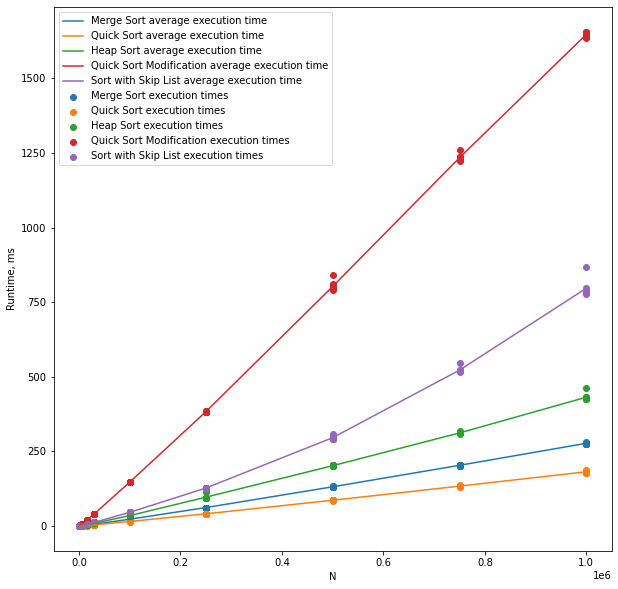

In [77]:
plot(data)

По графику можно сделать следующие выводы:
1. Несмотря на гарантированное время работы $O(N \log N)$, модификация быстрой сортировки является практически неэффективной в сравнении с другими представленными сортировками. Предположительно, перестроения массива медиан и поиск медиан множеств создают большую константу.
2. На случайных данных обычная быстрая сортировка показывает лучшее время. Это можно обосновать тем, что вероятность сгенерировать худший случай стремится к нулю, так как количество всевозможных наборов равно $M^N$, где $M = 2^{32}$ - количество int'ов. 
3. Среди сортировок с гарантированным временем работы $O(N \log N)$ лучшая - сортировка слиянием.
4. Сортировка с использованием Skip List - не лучший выбор. Хоть она и показывает не самое плохое время, ее написание требует намного больше усилий, чем, например, написание сортировки слиянием.

Из интереса посмотрим еще, что происходит на небольших $N$ (до 500)

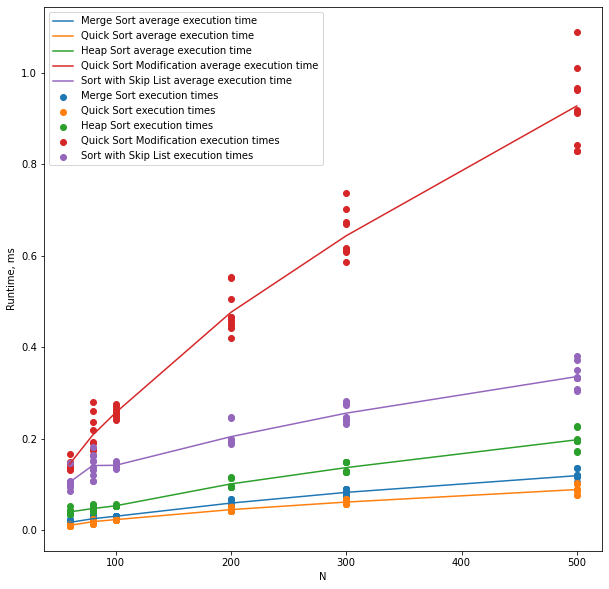

In [78]:
plot(data[data['N'] <= 500])

В целом, ничего примечательного. Относительный порядок сортировок по эффективности такой же как и на общем графике.

## Сравнение сортировки вставками и сортировки вставками с бинпоиском

С помощью программы <a href="https://github.com/Alexxios/Sort-comparison/blob/main/sources/insert.cpp">sources/insert.cpp</a> был получен файл, содержащий значения времени работы сортировки вставками (Insert Sort) и вставками с бинарным поиском (Insert Sort with Binary Search) на случайных наборах строк длины $M$ размера $N,\quad N\in\{10, 20, 40, 60, 80, 100, 200, 500, 750, 1000, 2000\}, M\in\{1, 2, 5, 10, 50, 100, 200, 300, \\500, 1000\}$. Для каждой пары $(N, M)$ проведено $T=10$ генераций случайного набора размера $N$ строк длины $M$. Для каждого сгенерированного набора замерено время работы каждой из сортировок на нем в миллисекундах.

In [79]:
data = pd.read_csv("insert_comparison.txt", sep=';', header=0)
data

,N,M,Insert Sort,Insert Sort with Binary Search
0,10,1,0.009250,0.006792
1,10,1,0.006125,0.007083
2,10,1,0.009125,0.006542
3,10,1,0.006375,0.006750
4,10,1,0.008125,0.006500
...,...,...,...,...
2195,2000,1000,73.538500,31.674208
2196,2000,1000,72.176167,31.252667
2197,2000,1000,73.849459,31.722750
2198,2000,1000,72.753292,31.670708


### Таблица усредненных значений (среднее время на наборе размера N строк длины M)

Усредним значения по парам $(N, M)$

In [80]:
mean = data.groupby(['N', 'M']).mean()
mean

Insert Sort  Insert Sort with Binary Search
N    M                                                
10   1        0.006819                        0.006756
     2        0.007094                        0.006721
     5        0.006883                        0.006671
     10       0.007044                        0.006671
     50       0.008519                        0.007373
...                ...                             ...
2000 100     47.860417                        8.282271
     200     52.541608                       11.222415
     300     55.606163                       16.106642
     500     61.498783                       21.223458
     1000    73.197610                       31.675462

[110 rows x 2 columns]

### Относительная таблица

Построим таблицу отношений $t_2/t_1$ для различных значений $N$ и $M$, где $t_1$ - время работы сортировки вставками, $t_2$ - время работы сортировки вставками с бинпоиском.

In [81]:
col1, col2 = mean.columns
rel = mean[col2].divide(mean[col1])
rel.unstack()

M,1,2,5,10,50,100,200,300,500,1000
N,,,,,,,,,,
10,0.990841,0.947433,0.969128,0.947094,0.865518,0.904341,0.975444,0.971569,0.957325,0.941698
20,0.840695,0.826371,0.799758,0.807993,0.820686,0.799355,0.801966,0.842508,0.819901,0.800313
40,0.588614,0.594035,0.595072,0.583557,0.636238,0.626228,0.631406,0.679680,0.673031,0.689161
60,0.493030,0.482460,0.471967,0.479392,0.542647,0.507968,0.531665,0.574033,0.597594,0.615746
80,0.414922,0.401912,0.406356,0.401550,0.478081,0.448915,0.469159,0.519675,0.543495,0.559049
100,0.369659,0.361381,0.368633,0.345191,0.435923,0.408910,0.422107,0.473430,0.505820,0.538540
200,0.249300,0.248893,0.244487,0.244784,0.324758,0.301083,0.319512,0.379117,0.410875,0.472940
500,0.158241,0.158040,0.157275,0.156978,0.242029,0.217500,0.245002,0.307267,0.370283,0.458374
750,0.133827,0.134497,0.134518,0.133688,0.220932,0.196271,0.228888,0.295193,0.367084,0.452330


Опираясь на таблицу, можно заключить:
1. С ростом $N$ при фиксированном $M$ сортировка с бинпоиском становится относительно все более эффективной по сравнению с обычной (значение $t_2/t_1$ уменьшается по столбцам)
2. На маленьких $N$ (10, 20) относительная эффективность сортировки с бинпоиском почти не зависит от $M$.
3. Чем больше $N$, тем отчетливее прослеживается закономерность: с ростом $M$ при фиксированном $N$ относительная эффективность сортировки с бинпоиском падает (значение $t_2/t_1$ увеличивается по строкам, особенно хорошо это видно в последних трех строках таблицы)